In [15]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


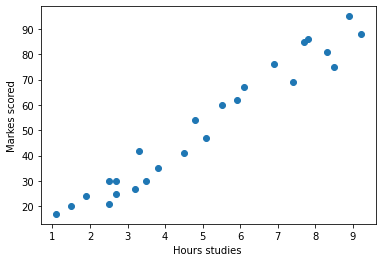

In [19]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel("Hours studies ")
plt.ylabel("Markes scored")
plt.show()

# Linear Regression

In [20]:
x=np.array(df["Hours"]).reshape(25,1)
y=np.array(df["Scores"]).reshape(25,1)


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [22]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)
print("Training Complete")


Training Complete


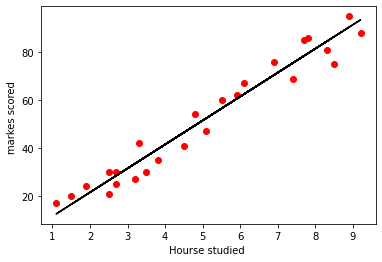

In [23]:
pred_scores=model.predict(x)
plt.scatter(df['Hours'],df['Scores'],color='red')
plt.xlabel("Hourse studied ")
plt.ylabel("markes scored ")
plt.plot(x,pred_scores,color="black")
plt.show()

# Predicting the Score

In [24]:
pred_scores[:5]

array([[26.5],
       [52.5],
       [33.5],
       [86.5],
       [36.5]])

In [25]:
#camparing the actual scores and Predicted scores
Score =pd.DataFrame({"ACtual Scores":df["Scores"],"predected Scores":pred_scores.reshape(25,)})
Score.head(10)

,ACtual Scores,predected Scores
0,21,26.5
1,47,52.5
2,27,33.5
3,75,86.5
4,30,36.5
5,20,16.5
6,88,93.5
7,60,56.5
8,81,84.5
9,25,28.5


In [26]:
#Using Custom Data

hours =[[9.25]]
custom_predict = model.predict(hours)
print("For {} hours the student can get {} marks".format(hours[0][0],custom_predict[0][0]))




For 9.25 hours the student can get 94.00000000000003 marks


In [ ]:
Evaluating the Model

In [27]:
#accurancy of the model
print(model.score(x_test,y_test))

0.9470752260220126


In [33]:
#mean square error of the madel
from sklearn import metrics
loss = metrics.mean_squared_error(y,pred_scores)
print("The Mean Square Error is " + str(loss))

The Mean Square Error is 29.210000000000022
